In [1]:
import numpy as np
import pandas as pd
import datetime
import statsmodels as sm
import matplotlib.pyplot as plt
# import seaborn as sns


%matplotlib inline

data = pd.read_csv('../data/airpassengers.csv')
data.head(10)


,date,AirPassengers
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
5,1949.416667,135
6,1949.500000,148
7,1949.583333,148
8,1949.666667,136
9,1949.750000,119


In [2]:
d = pd.date_range(start='1/1/1980', end='11/1/1990', freq='MS')
data['date'] = pd.date_range(start='1/1/1949', end='12/1/1960', freq='MS')
# data.set_index('date', inplace=True)
print(data)

          date  AirPassengers
0   1949-01-01            112
1   1949-02-01            118
2   1949-03-01            132
3   1949-04-01            129
4   1949-05-01            121
..         ...            ...
139 1960-08-01            606
140 1960-09-01            508
141 1960-10-01            461
142 1960-11-01            390
143 1960-12-01            432

[144 rows x 2 columns]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


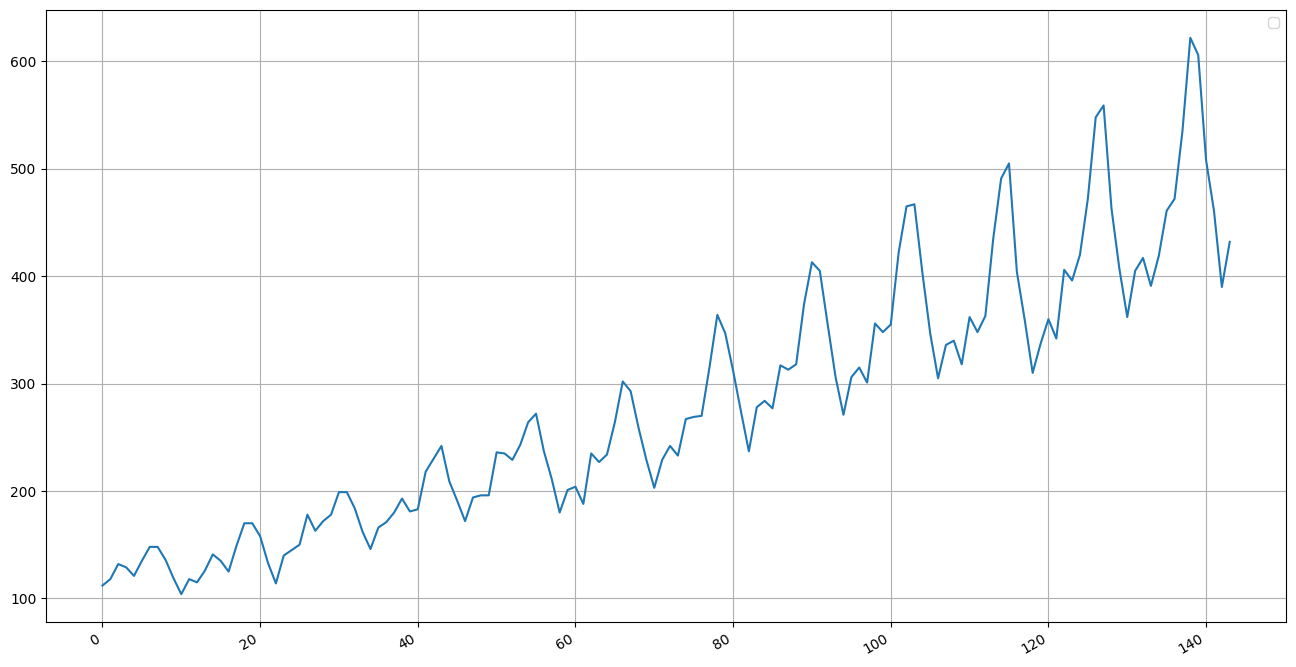

In [3]:
fig, ax = plt.subplots(figsize=(16, 9))
fig.autofmt_xdate()
ax.plot(data.AirPassengers)
ax.legend()
ax.grid()

In [4]:
# datashift = pd.DataFrame()
for i in range(12, 0, -1):
   data['t-' + str(i)] = data.AirPassengers.shift(i)
print(data)

          date  AirPassengers   t-12   t-11   t-10    t-9    t-8    t-7  \
0   1949-01-01            112    NaN    NaN    NaN    NaN    NaN    NaN   
1   1949-02-01            118    NaN    NaN    NaN    NaN    NaN    NaN   
2   1949-03-01            132    NaN    NaN    NaN    NaN    NaN    NaN   
3   1949-04-01            129    NaN    NaN    NaN    NaN    NaN    NaN   
4   1949-05-01            121    NaN    NaN    NaN    NaN    NaN    NaN   
..         ...            ...    ...    ...    ...    ...    ...    ...   
139 1960-08-01            606  559.0  463.0  407.0  362.0  405.0  417.0   
140 1960-09-01            508  463.0  407.0  362.0  405.0  417.0  391.0   
141 1960-10-01            461  407.0  362.0  405.0  417.0  391.0  419.0   
142 1960-11-01            390  362.0  405.0  417.0  391.0  419.0  461.0   
143 1960-12-01            432  405.0  417.0  391.0  419.0  461.0  472.0   

       t-6    t-5    t-4    t-3    t-2    t-1  
0      NaN    NaN    NaN    NaN    NaN    NaN  
1  

In [5]:
data['month'] = data['date'].dt.month
print(data)

          date  AirPassengers   t-12   t-11   t-10    t-9    t-8    t-7  \
0   1949-01-01            112    NaN    NaN    NaN    NaN    NaN    NaN   
1   1949-02-01            118    NaN    NaN    NaN    NaN    NaN    NaN   
2   1949-03-01            132    NaN    NaN    NaN    NaN    NaN    NaN   
3   1949-04-01            129    NaN    NaN    NaN    NaN    NaN    NaN   
4   1949-05-01            121    NaN    NaN    NaN    NaN    NaN    NaN   
..         ...            ...    ...    ...    ...    ...    ...    ...   
139 1960-08-01            606  559.0  463.0  407.0  362.0  405.0  417.0   
140 1960-09-01            508  463.0  407.0  362.0  405.0  417.0  391.0   
141 1960-10-01            461  407.0  362.0  405.0  417.0  391.0  419.0   
142 1960-11-01            390  362.0  405.0  417.0  391.0  419.0  461.0   
143 1960-12-01            432  405.0  417.0  391.0  419.0  461.0  472.0   

       t-6    t-5    t-4    t-3    t-2    t-1  month  
0      NaN    NaN    NaN    NaN    NaN    Na

In [6]:
train = data.loc[:100].dropna()
test  = data.loc[100:].dropna()
x_train = train.loc[:, (train.columns != 'AirPassengers') & (train.columns != 'date')]
y_train = train['AirPassengers']
x_test  = test.loc[:, (test.columns != 'AirPassengers') & (test.columns != 'date')]
y_test  = test['AirPassengers']
print(x_train)
print(y_train)
x_train.dtypes


      t-12   t-11   t-10    t-9    t-8    t-7    t-6    t-5    t-4    t-3  \
12   112.0  118.0  132.0  129.0  121.0  135.0  148.0  148.0  136.0  119.0   
13   118.0  132.0  129.0  121.0  135.0  148.0  148.0  136.0  119.0  104.0   
14   132.0  129.0  121.0  135.0  148.0  148.0  136.0  119.0  104.0  118.0   
15   129.0  121.0  135.0  148.0  148.0  136.0  119.0  104.0  118.0  115.0   
16   121.0  135.0  148.0  148.0  136.0  119.0  104.0  118.0  115.0  126.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
96   284.0  277.0  317.0  313.0  318.0  374.0  413.0  405.0  355.0  306.0   
97   277.0  317.0  313.0  318.0  374.0  413.0  405.0  355.0  306.0  271.0   
98   317.0  313.0  318.0  374.0  413.0  405.0  355.0  306.0  271.0  306.0   
99   313.0  318.0  374.0  413.0  405.0  355.0  306.0  271.0  306.0  315.0   
100  318.0  374.0  413.0  405.0  355.0  306.0  271.0  306.0  315.0  301.0   

       t-2    t-1  month  
12   104.0  118.0      1  
13   118.0  115.0    

t-12     float64
t-11     float64
t-10     float64
t-9      float64
t-8      float64
t-7      float64
t-6      float64
t-5      float64
t-4      float64
t-3      float64
t-2      float64
t-1      float64
month      int32
dtype: object

In [7]:
import timeseries

import importlib
importlib.reload(timeseries)

data.dropna(inplace=True)

X = data.loc[:, (train.columns != 'AirPassengers') & (train.columns != 'date')]
y = data['AirPassengers']

x_train, x_test, y_train, y_test = timeseries.timeseries_train_test_split(X, y, train_size=100)

# print(X_train)
# print(y_train)
# print(X_test)



In [8]:
from sklearn.ensemble import RandomForestRegressor
rf  = RandomForestRegressor(n_estimators=100, random_state=1, oob_score=True)
# rfe = RFE(rf, 4)
fit = rf.fit(x_train, y_train)

In [9]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

# Access the OOB Score
oob_score = fit.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
y_pred = fit.predict(x_train)

# Evaluating the model
mse = mean_squared_error(y_train, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_train, y_pred)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.9532445943751102
Mean Squared Error: 40.915604
R-squared: 0.9939180906817651


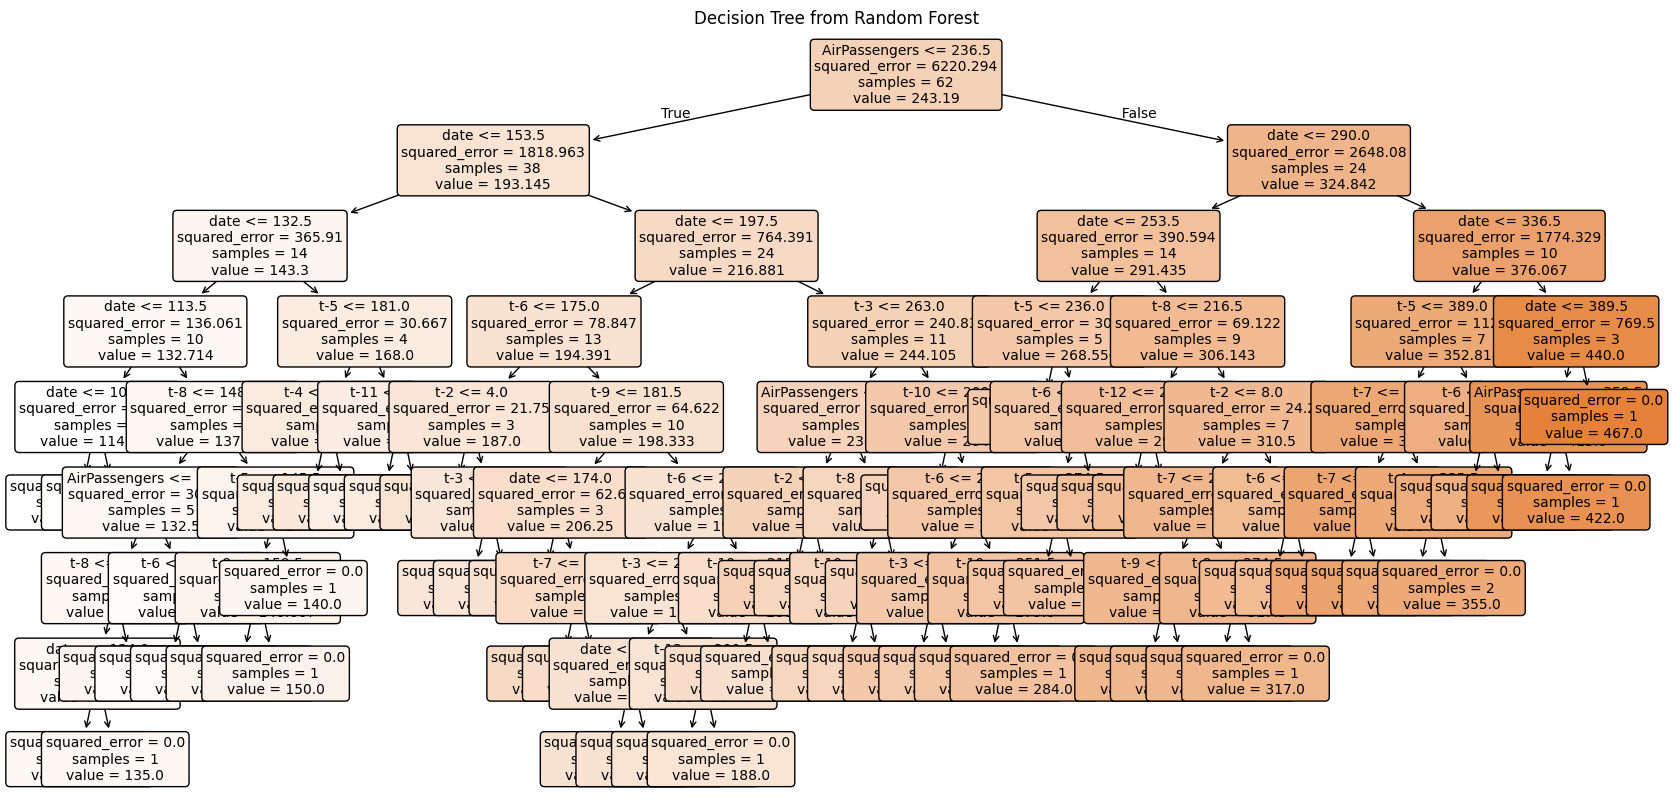

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = fit.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=data.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

Mean Squared Error: 40.9
R-squared:  1.0
Mean Squared Error: 3603.7
R-squared:  0.4


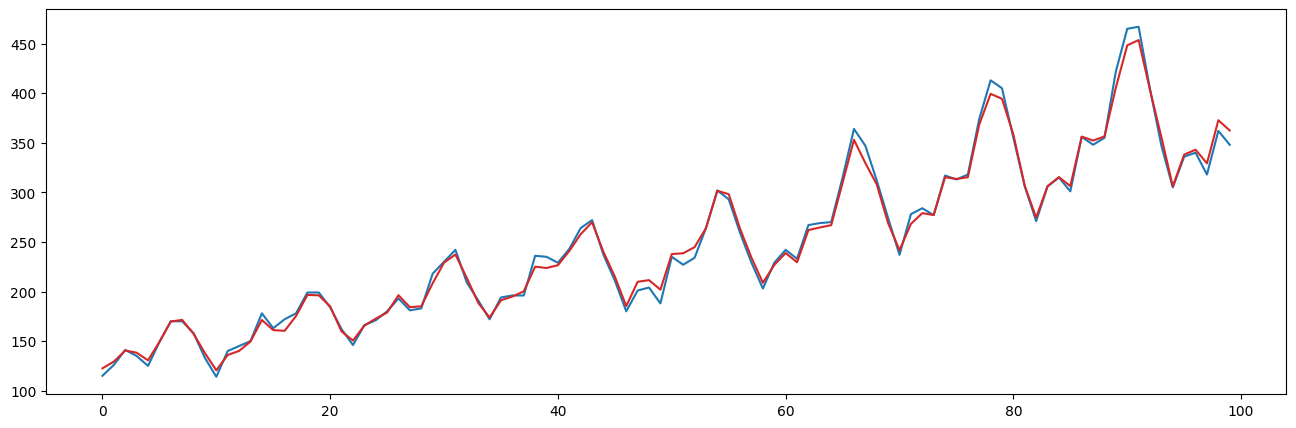

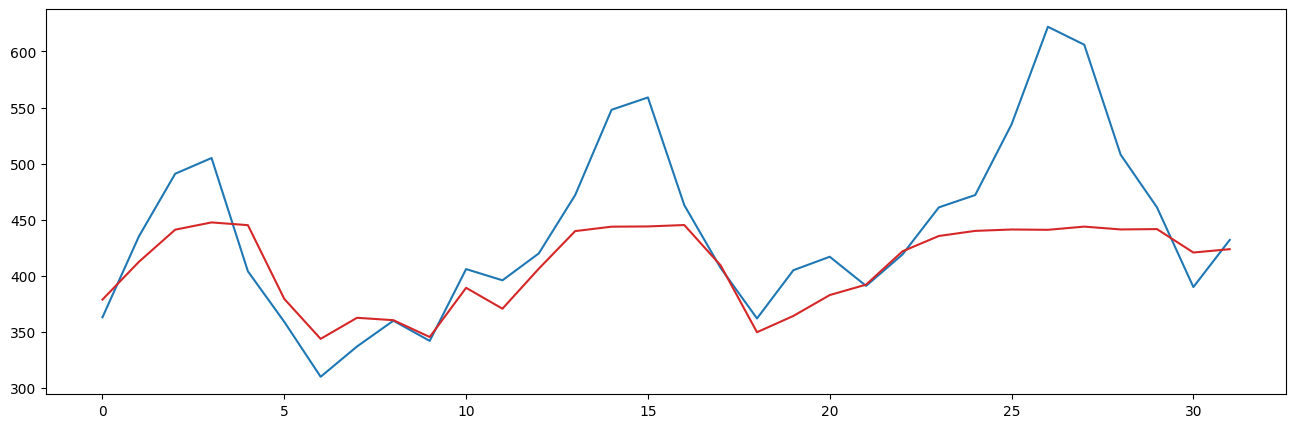

In [11]:
import importlib
import timeseries
importlib.reload(timeseries)


# timeseries.plot_tree(data, fit.estimators_[0])

# y_train_pred = fit.predict(x_train)
# y_test_pred = fit.predict(x_test)
# timeseries.show_performance(y_train, y_train_pred)
# timeseries.show_performance(y_test, y_test_pred)

timeseries.timeseries_model_eval(fit, x_train, y_train)
timeseries.timeseries_model_eval(fit, x_test, y_test)


12    -25.741667
13    -39.241667
14     -3.216667
15     -8.841667
16     -3.858333
         ...    
139    66.887500
140    17.225000
141   -21.891667
142   -56.595833
143   -30.450000
Name: seasonal, Length: 132, dtype: float64


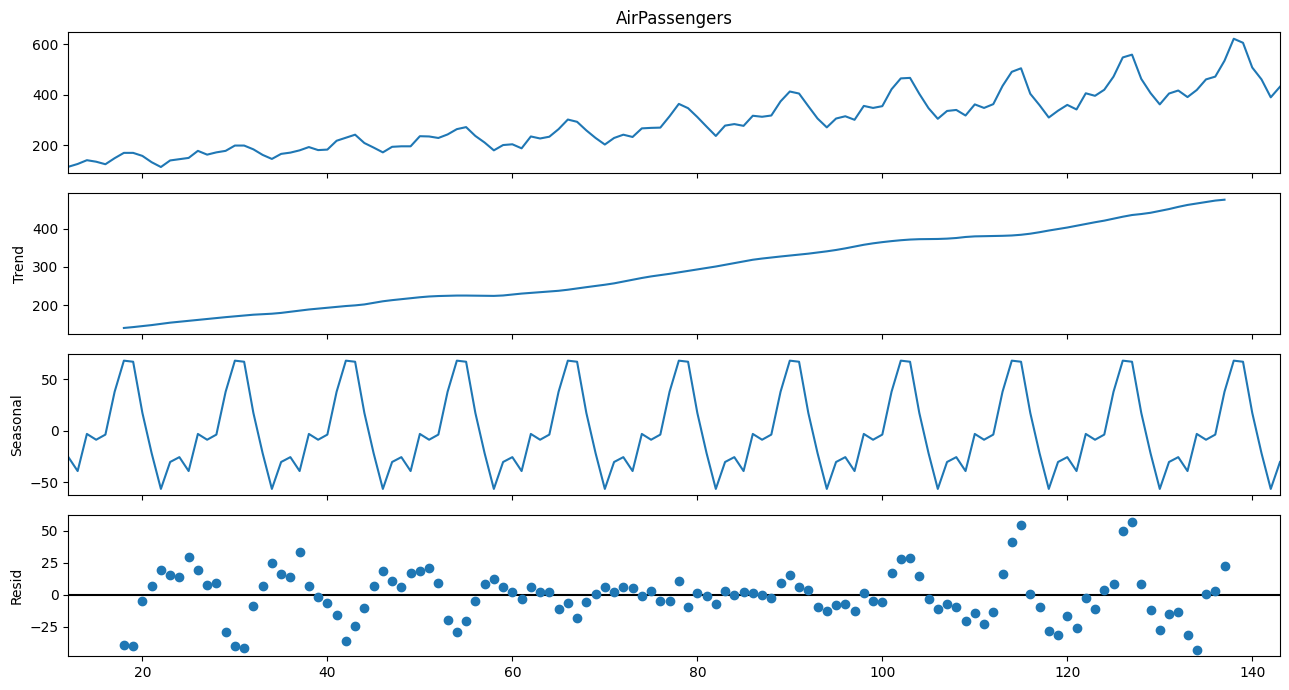

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['AirPassengers'], model='additive', period=12)
plt.rcParams["figure.figsize"] = [13, 7]
fig = decomposition.plot()

print(decomposition.seasonal)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


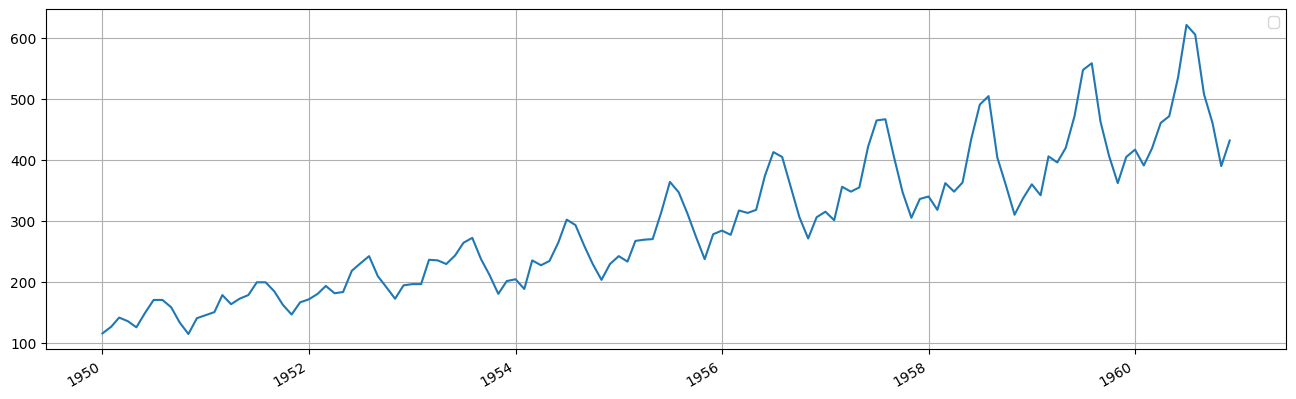

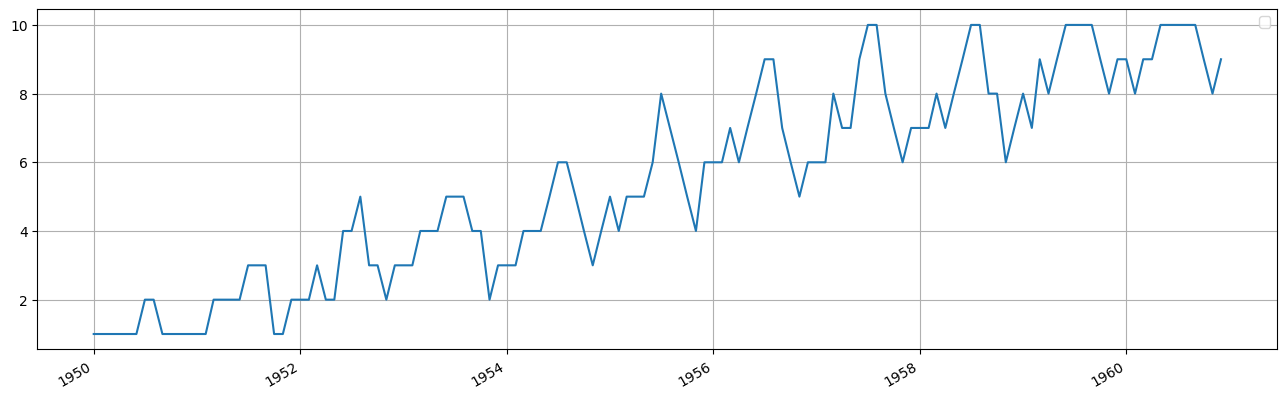

In [13]:
import importlib
import timeseries
importlib.reload(timeseries)

metrics = data.copy()
metrics.set_index('date', inplace=True)
metrics_q = timeseries.to_bins(metrics)

# print(metrics)
# print(metrics_q)

timeseries.plot(metrics.AirPassengers)
timeseries.plot(metrics_q.AirPassengers)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


      t-12   t-11   t-10    t-9    t-8    t-7    t-6    t-5    t-4    t-3  \
12   112.0  118.0  132.0  129.0  121.0  135.0  148.0  148.0  136.0  119.0   
13   118.0  132.0  129.0  121.0  135.0  148.0  148.0  136.0  119.0  104.0   
14   132.0  129.0  121.0  135.0  148.0  148.0  136.0  119.0  104.0  118.0   
15   129.0  121.0  135.0  148.0  148.0  136.0  119.0  104.0  118.0  115.0   
16   121.0  135.0  148.0  148.0  136.0  119.0  104.0  118.0  115.0  126.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
139  559.0  463.0  407.0  362.0  405.0  417.0  391.0  419.0  461.0  472.0   
140  463.0  407.0  362.0  405.0  417.0  391.0  419.0  461.0  472.0  535.0   
141  407.0  362.0  405.0  417.0  391.0  419.0  461.0  472.0  535.0  622.0   
142  362.0  405.0  417.0  391.0  419.0  461.0  472.0  535.0  622.0  606.0   
143  405.0  417.0  391.0  419.0  461.0  472.0  535.0  622.0  606.0  508.0   

       t-2    t-1  month  
12   104.0  118.0      1  
13   118.0  115.0    

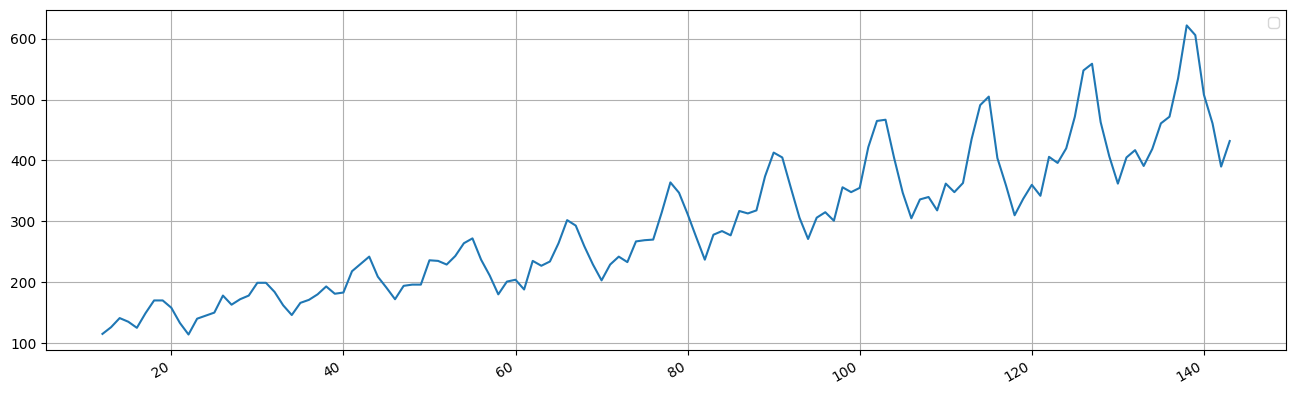

In [14]:
import importlib
import timeseries
importlib.reload(timeseries)

newdata = data.copy()
tsmodel = timeseries.TimeSeriesRandomForestRegressor(newdata, target="AirPassengers")
tsmodel.plot()

print(tsmodel.X)
print(tsmodel.y)

fit = tsmodel.fit(random_state=1)

